In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline 

In [2]:
#load dataset for train 
os.chdir("C:/Users/hp/Downloads/house-prices-advanced-regression-techniques (1)")
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
train.shape    

(1460, 81)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Analysis on the target variable 

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


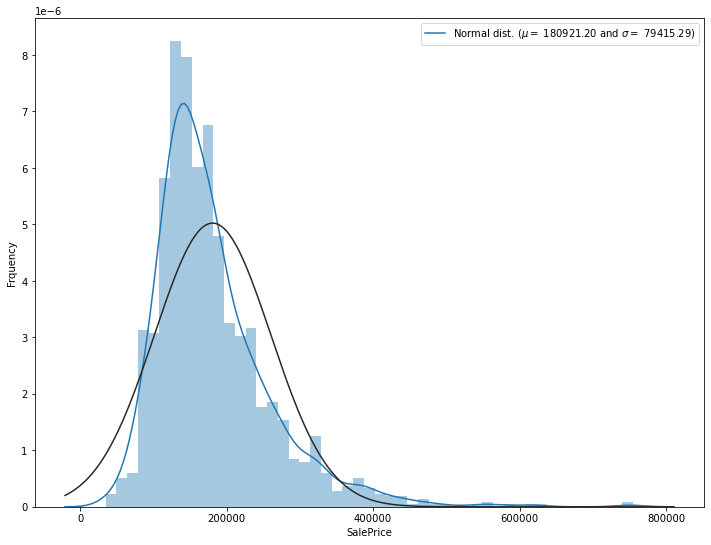

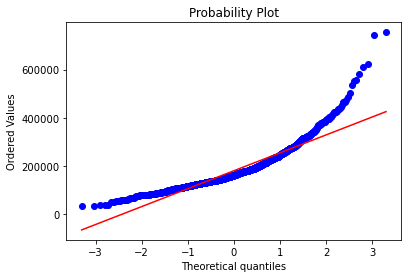

In [7]:
plt.subplots(figsize = (12,9))
sns.distplot(train['SalePrice'], fit = stats.norm)

#get the fitted parameter used by the function 
(mu,sigma) = stats.norm.fit(train['SalePrice'])
#plot with the distribution 
plt.legend(['Normal dist. ($\mu= $ {:.2f} and $\sigma= $ {:.2f})'.format(mu,sigma)], loc='best')
plt.ylabel('Frquency')
#probability plot
fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

#### The target variable is right skwed. now we need to transform this variable and make it normal distribution.

#### use of log function is the most comman way to make more normal distribution. we will do that in the following section.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


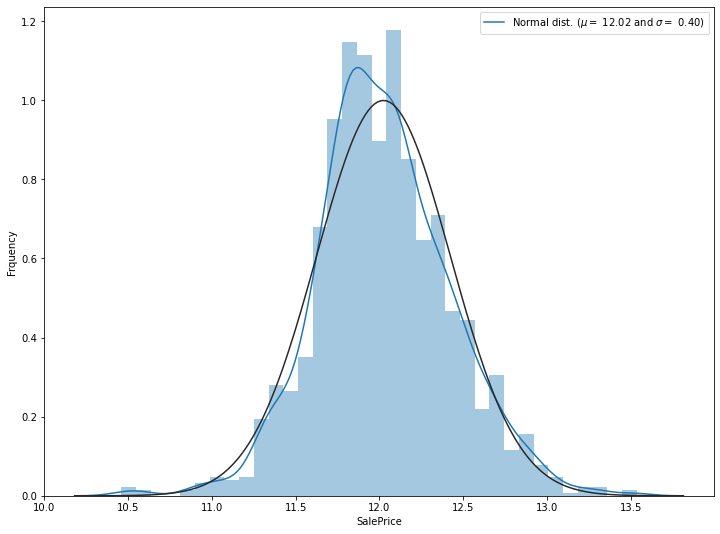

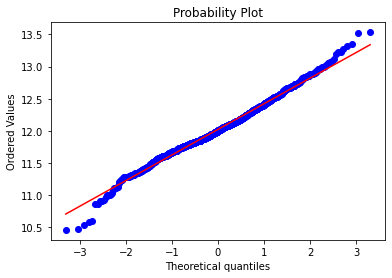

In [8]:
#we use the which is a part of numpy libray
train['SalePrice'] = np.log1p(train['SalePrice'])
#check again for normal distribution
plt.subplots(figsize = (12,9))
sns.distplot(train['SalePrice'], fit = stats.norm)

#get the fitted parameter used by the function 
(mu,sigma) = stats.norm.fit(train['SalePrice'])
#plot with the distribution 
plt.legend(['Normal dist. ($\mu= $ {:.2f} and $\sigma= $ {:.2f})'.format(mu,sigma)], loc='best')
plt.ylabel('Frquency')
#probability plot
fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

#### The target variable is normally skwed. 

In [9]:
#lets check the data if any
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [10]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
train.isnull().any() #generate a boolean array that can be passed as  an index to columns attribute of train

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

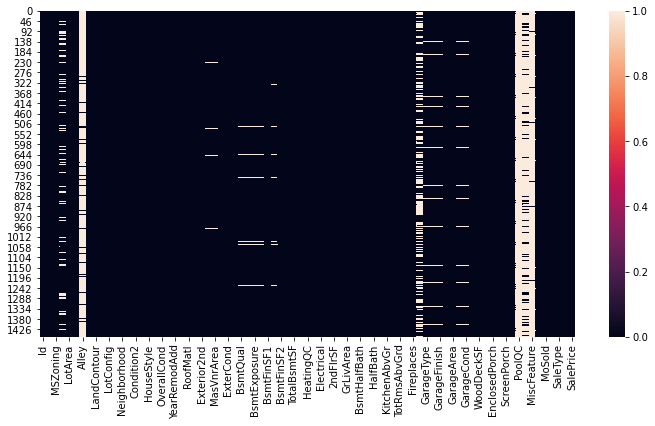

In [12]:
#plot of missing value attributes
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull())
plt.show()

In [13]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [14]:
#missing value counts in each columns
Isnull = train.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [15]:
#visulazing missing value s
#convert to a dataframe 
Isnull = Isnull.to_frame()

In [16]:
Isnull.columns = ['count']   # creating a columns naming counts that contains the  of missing values variable wise

In [17]:
Isnull.index.names = ['Name']  # creating a columns that contains the ta name of  variable

In [18]:
Isnull['Name'] = Isnull.index   # using index values i.e. the feature names and staring names in new column 'name'  we just created

In [19]:
Isnull

,count,Name
Name,,
PoolQC,99.520548,PoolQC
MiscFeature,96.301370,MiscFeature
Alley,93.767123,Alley
Fence,80.753425,Fence
FireplaceQu,47.260274,FireplaceQu
LotFrontage,17.739726,LotFrontage
GarageYrBlt,5.547945,GarageYrBlt
GarageType,5.547945,GarageType
GarageFinish,5.547945,GarageFinish


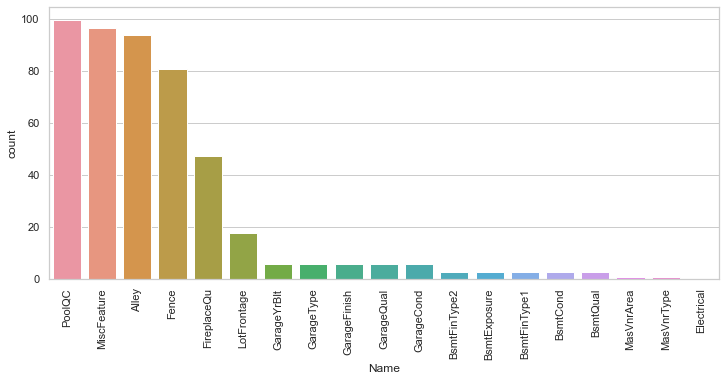

In [20]:
#plot missing values 
plt.figure(figsize = (12,5))
sns.set(style = 'whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation=90)
plt.show()

In [21]:
#correlation between train attribute 
#seperate data which has only numeric values 
train_corr = train.select_dtypes(include=[np.number])

In [22]:
train_corr.shape

(1460, 38)

In [23]:
#delete  in because there is no need for corrleation plot
del train_corr['Id']

<AxesSubplot:>

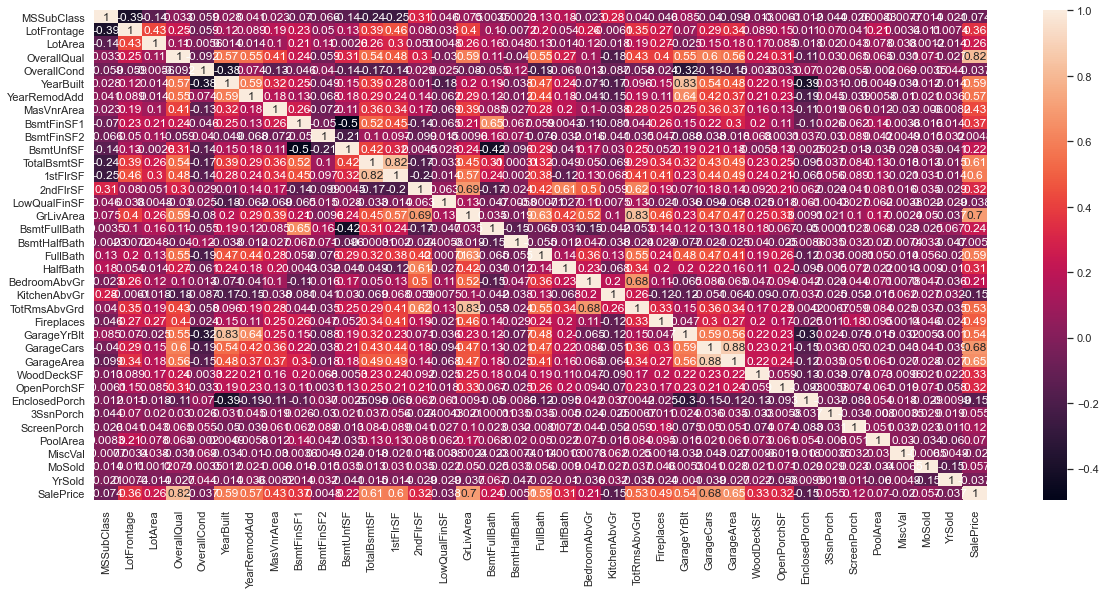

In [24]:
#correlation plot
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

#### Top 50% correlation train atrribute with target variable

In [25]:
corr[corr['SalePrice'] > 0.5]['SalePrice']

OverallQual     0.817185
YearBuilt       0.586570
YearRemodAdd    0.565608
TotalBsmtSF     0.612134
1stFlrSF        0.596981
GrLivArea       0.700927
FullBath        0.594771
TotRmsAbvGrd    0.534422
GarageYrBlt     0.541073
GarageCars      0.680625
GarageArea      0.650888
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [26]:
corr.index[corr['SalePrice']> 0.5]     #columns which correlation value is ghether than 0.5

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')

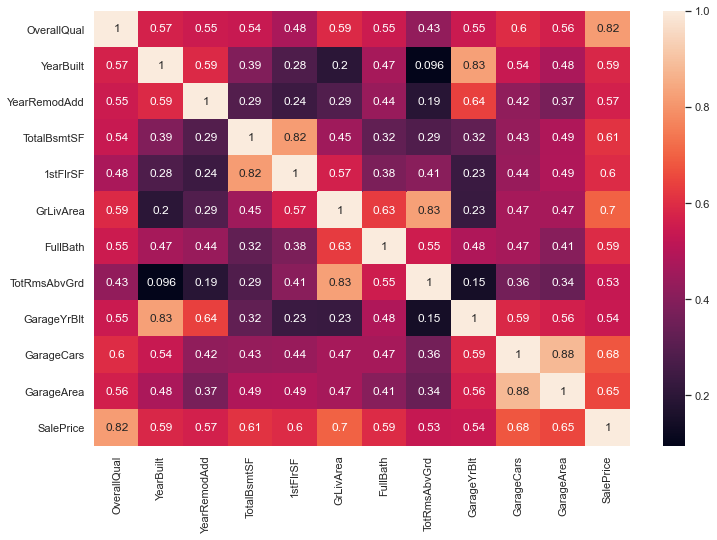

In [27]:
top_feature = corr.index[abs(corr['SalePrice'] > 0.5)]
plt.subplots(figsize=[12,8])
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [28]:
#overallqual is highly correlation with saleprice has a correlation coeff of  0.82
#unique values of overallQual
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

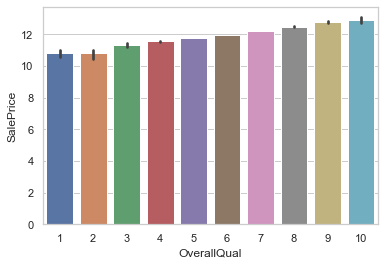

In [29]:
sns.barplot(train.OverallQual, train.SalePrice)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

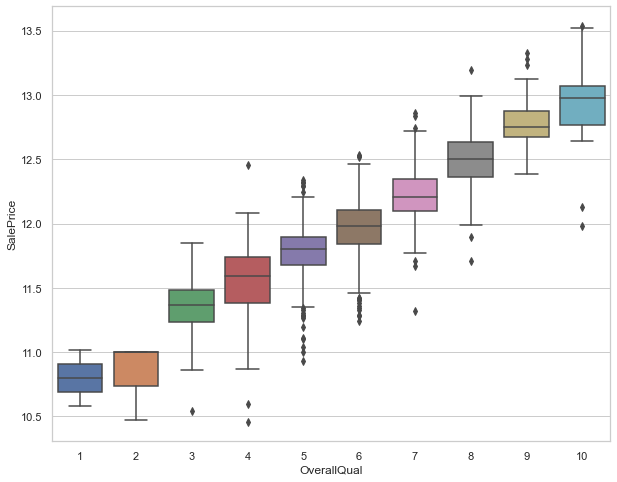

In [30]:
#boxplot
plt.figure(figsize=(10,8))
sns.boxplot(train.OverallQual, train.SalePrice)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


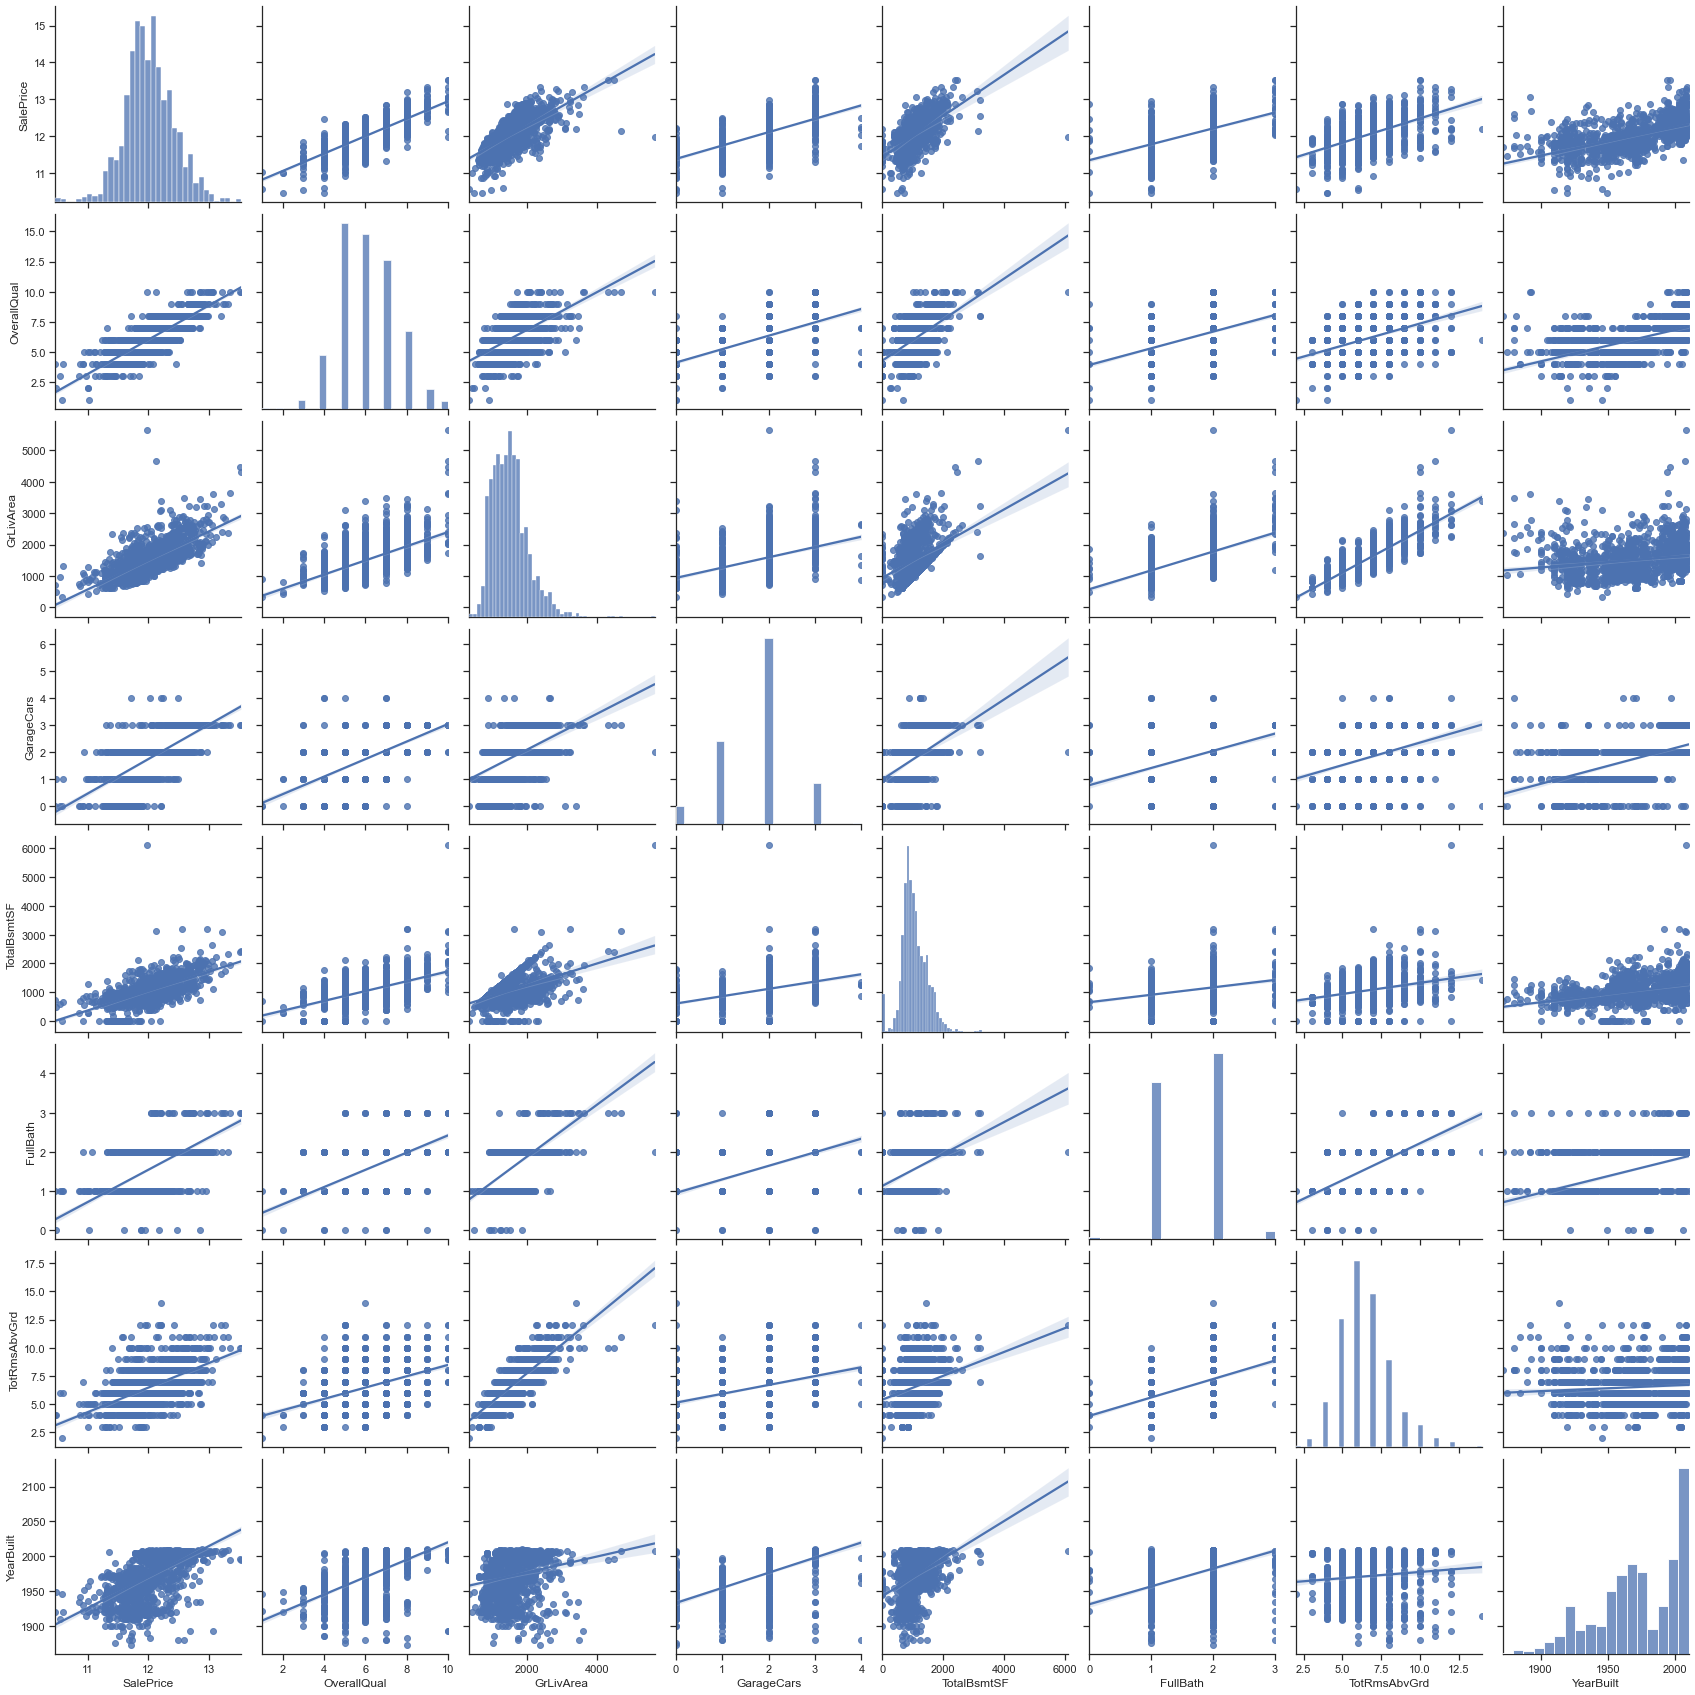

In [31]:
col = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt']  #Ggh
sns.set(style='ticks')
sns.pairplot(train[col], size=3, kind='reg')

In [32]:
corr           #matrix of correlation

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.355879
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817185
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.430809
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,0.004832


In [33]:
print('Find the most important features realtive to the target')
corr = train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find the most important features realtive to the target


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

In [34]:
#Imputting missing values 
#PoolQC  missing values ratio of 99%+, so there we fill 'None'
train['PoolQC'] = train['PoolQC'].fillna('None')

In [35]:
train.PoolQC.value_counts()

None    1453
Gd         3
Fa         2
Ex         2
Name: PoolQC, dtype: int64

In [36]:
#for feature having 50% missing values again fill with 'None'

In [37]:
train['MiscFeature'] = train['MiscFeature'].fillna('None')

In [38]:
train.MiscFeature.value_counts()

None    1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [39]:
train['Alley'] = train['Alley'].fillna('None')

In [40]:
train['Fence'] = train['Fence'].fillna('None')

In [41]:
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

In [42]:
#groupby neighorhoad and fill in missing values by the median LotFrontage of all the neighborhood
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [43]:
train.groupby('Neighborhood')['LotFrontage'].median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    65.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    91.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64

In [44]:
#other way 
train.groupby('Neighborhood')['LotFrontage'].fillna(train.groupby('Neighborhood')['LotFrontage'].median())

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [45]:
train.LotFrontage.describe()

count    1460.000000
mean       70.199658
std        22.431902
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [46]:
#garatype, garafinish, garagequal and garagecond will replace them with None
for col in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    train[col] = train[col].fillna('None')

In [47]:
#GarageYrBlt, GarageArea,GarageCars repalce by 0
for col in ['GarageYrBlt','GarageArea','GarageCars']:
    train[col] = train[col].fillna(int(0))   

In [48]:
for col in ['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual']:
    train[col] = train[col].fillna('None')

In [49]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))

In [50]:
train['MasVnrType'] = train['MasVnrType'].fillna('None')

In [51]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]

In [52]:
#remove outliers
train = train.drop(['Utilities'], axis=1)

<AxesSubplot:>

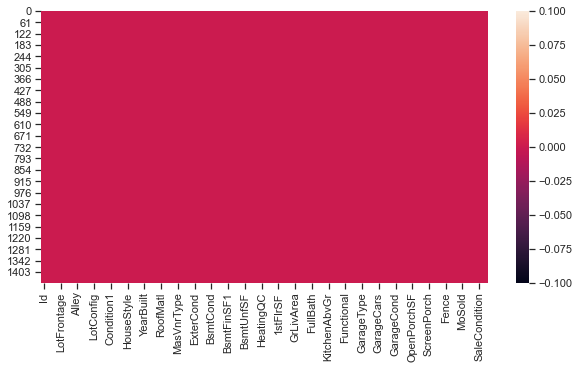

In [53]:
#check if there is any null values or not
plt.figure(figsize = (10,5))
sns.heatmap(train.isnull())

In [54]:
train_cat = train.select_dtypes(include = 'object').columns

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
#Label encoding categorical variables
for c in train_cat:
    lbl = LabelEncoder()
    lbl.fit(list(train[c].values))
    train[c] = lbl.transform(list(train[c].values)) 

In [57]:
#Preapring data for prediction
y = train['SalePrice']

In [58]:
#delete saleprice
del train['SalePrice']

In [59]:
#Take the values as x and y
x = train.values
y = y.values

In [60]:
#split data into and test fromat
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=7)

In [61]:
#perform linear regression
from sklearn.linear_model import LinearRegression

In [62]:
model = LinearRegression()


In [63]:
model.fit(x_train, y_train)

LinearRegression()

In [64]:
#prediction for a data points
print('Predict Value', (model.predict([x_test[142]])))
print('Actual Value', (y_test[142]))

Predict Value [11.62827329]
Actual Value 11.767187766223199


In [65]:
#score/Accuracy
print('Accuracy', model.score(x_test, y_test)*100)

Accuracy 89.22310614679758


In [66]:
yhat=model.predict(x)

In [67]:
yhat.shape

(1460,)

In [68]:
print(model.intercept_)

17.759596791310244


In [69]:
y_pred=model.predict(x_test)
y_pred

array([11.90244598, 12.16526362, 12.08920471, 11.4311834 , 11.69353707,
       12.5955113 , 11.89422425, 11.73073891, 11.8588242 , 11.73767733,
       12.32212678, 11.96425952, 11.66337375, 12.21393277, 12.13344956,
       12.06535934, 12.30742413, 11.80284101, 11.84061849, 11.97531678,
       12.14268641, 11.95760117, 11.54025308, 12.3513166 , 12.7402144 ,
       11.69149469, 11.70071543, 12.1213375 , 12.35560523, 11.69603644,
       12.17818093, 12.17883292, 12.5384628 , 12.43546595, 12.11768551,
       12.45772161, 11.78062772, 11.90766696, 12.54096992, 12.18509587,
       11.72083035, 12.04900902, 11.9453558 , 11.69154899, 12.44411039,
       12.37052193, 12.16604586, 12.05542859, 12.61160998, 12.37512431,
       12.36796175, 12.06187517, 12.08828395, 12.24306626, 11.86864558,
       11.60775469, 12.59532396, 11.95702973, 12.21235772, 12.20260928,
       11.89382254, 12.38266005, 11.9746992 , 11.82050068, 11.58423965,
       12.25553687, 11.66156707, 12.12639563, 11.98572406, 12.12

In [70]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r_squared=r2_score(y_test,y_pred)

In [71]:
from math import sqrt
rmse = sqrt(mse)

In [72]:
print("Mean_squared_error:",mse)
print("Root_mean_sqaured_error:",rmse)
print("r_squared_value:",r_squared)

Mean_squared_error: 0.01805894713615915
Root_mean_sqaured_error: 0.13438358209304865
r_squared_value: 0.8922310614679757


In [73]:
yhat1=model.predict(x_test)
yhat1

array([11.90244598, 12.16526362, 12.08920471, 11.4311834 , 11.69353707,
       12.5955113 , 11.89422425, 11.73073891, 11.8588242 , 11.73767733,
       12.32212678, 11.96425952, 11.66337375, 12.21393277, 12.13344956,
       12.06535934, 12.30742413, 11.80284101, 11.84061849, 11.97531678,
       12.14268641, 11.95760117, 11.54025308, 12.3513166 , 12.7402144 ,
       11.69149469, 11.70071543, 12.1213375 , 12.35560523, 11.69603644,
       12.17818093, 12.17883292, 12.5384628 , 12.43546595, 12.11768551,
       12.45772161, 11.78062772, 11.90766696, 12.54096992, 12.18509587,
       11.72083035, 12.04900902, 11.9453558 , 11.69154899, 12.44411039,
       12.37052193, 12.16604586, 12.05542859, 12.61160998, 12.37512431,
       12.36796175, 12.06187517, 12.08828395, 12.24306626, 11.86864558,
       11.60775469, 12.59532396, 11.95702973, 12.21235772, 12.20260928,
       11.89382254, 12.38266005, 11.9746992 , 11.82050068, 11.58423965,
       12.25553687, 11.66156707, 12.12639563, 11.98572406, 12.12

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


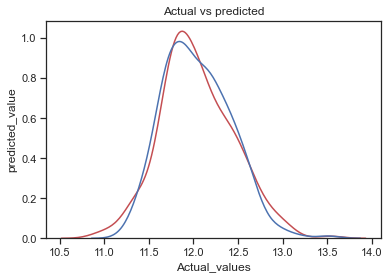

In [74]:
#distribution plot to compare actual vs predicted values for price
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual values')
sns.distplot(y_pred,hist=False,color='b',label='Fitted values',ax=ax1)
plt.title('Actual vs predicted')
plt.xlabel('Actual_values')
plt.ylabel('predicted_value')
plt.show()

Text(0, 0.5, 'Actual - Predicted')

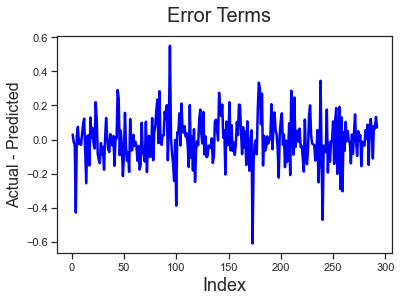

In [75]:
#Error terms
c = [i for i in range(1,293,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20) #plot headding
plt.xlabel('Index', fontsize=18)
plt.ylabel('Actual - Predicted', fontsize=16)

#### Polynomial

In [76]:
from sklearn.preprocessing import PolynomialFeatures

In [77]:
poly = PolynomialFeatures(degree=2)

In [78]:
x_train_poly = poly.fit_transform(x_train)

In [79]:
model_poly =model.fit(x_train_poly,y_train)

In [80]:
model_poly = model.predict(x_train_poly)

In [87]:
yhat_poly = model.predict(x_train_poly)

In [89]:
x_test_poly = poly.fit_transform(x_test)

In [90]:
model_poly = model.predict(x_test_poly)

In [93]:
yhat_poly2 = model.predict(x_test_poly)

In [88]:
yhat_poly[0:5]

array([12.43718833, 11.81303746, 11.54830226, 12.16003394, 11.71178452])

In [94]:
yhat_poly2[0:5]

array([11.60392377, 14.9081354 , 11.63456887, 10.89132689, 11.4873324 ])

In [96]:
y_test[0:5]

array([11.93164238, 12.14950759, 12.05980911, 11.00211651, 11.71994776])

In [106]:
print('R squared using polynomial Regression:',r2_score(y_test,yhat_poly2))
print('Mean squared error using Ploynomial Regression:',mean_squared_error(y_test,yhat_poly2))
print('Root mean squared error using Polynomail Regression:', np.sqrt(mean_squared_error(y_test,yhat_poly2)))

R squared using polynomial Regression: -193.85279933289073
Mean squared error using Ploynomial Regression: 32.65167543094668
Root mean squared error using Polynomail Regression: 5.714164456064131


In [81]:
from sklearn.model_selection import cross_val_score    #cross validation 

In [82]:
Rcross = cross_val_score(model,x_train,y_train, cv=5)

In [83]:
Rcross

array([0.8789095 , 0.43872272, 0.86907078, 0.35508544, 0.88603313])

In [84]:
Rcross = cross_val_score(model,x_test,y_test, cv=5)

In [85]:
Rcross

array([0.82882039, 0.91060102, 0.85291826, 0.82756807, 0.67637017])